In [1]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import os
import sys

scriptpath = "binarygridsearch.py"
# Do the import
sys.path.append(os.path.abspath(scriptpath))

# Do the import
import binarygridsearch as bgs
%aimport binarygridsearch

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#Define a function that just returns accuracy
def getForestAccuracy(X, y, metric, kwargs):
    clf = RandomForestClassifier(**kwargs)
    clf.fit(X, y)
    y_pred = clf.oob_decision_function_[:, 1]
    return metric(y, y_pred)

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

In [8]:
rfArgs = {"random_state": 0,
          "n_jobs": -1,
          "class_weight": "balanced",
         "oob_score": True}

In [9]:
n_estimators = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "n_estimators", 
                    0, 
                    18, 
                    128)

,n_estimators,score,time,scoreTimeRatio
0,18,0.114413,0.496218,0.000000
1,128,1.106098,1.002800,0.002294
2,73,1.111389,0.432633,0.006149
3,45,1.065282,0.002800,1.000000
4,59,1.087202,0.360741,0.007319
5,66,1.112901,0.400506,0.006701
6,70,1.114413,0.425162,0.006287
7,68,1.110633,0.403368,0.006635


,n_estimators,score,time
0,18,0.980736,0.366535
1,128,0.989403,0.547471
2,73,0.989450,0.343825
3,45,0.989047,0.190301
4,59,0.989238,0.318147
5,66,0.989463,0.332350
6,70,0.989476,0.341156
7,68,0.989443,0.333372


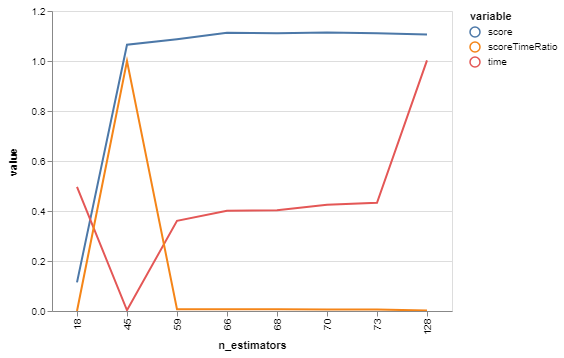

In [10]:
bgs.showTimeScoreChartAndGraph(n_estimators)

,n_estimators,score,time,scoreTimeRatio
0,45,1.845951,0.002884,1.000000
1,128,2.504488,1.002884,0.000000
2,86,2.614244,0.549439,0.003545
3,65,2.638634,0.363449,0.007469
4,76,2.724000,0.425114,0.006133
5,70,2.638634,0.461370,0.005053
6,73,2.589854,0.401651,0.006196
7,74,2.845951,0.374253,0.008009


,n_estimators,score,time
0,45,0.989047,0.205071
1,128,0.989403,0.551849
2,86,0.989463,0.394604
3,65,0.989476,0.330107
4,76,0.989522,0.351491
5,70,0.989476,0.364064
6,73,0.989450,0.343355
7,74,0.989588,0.333854


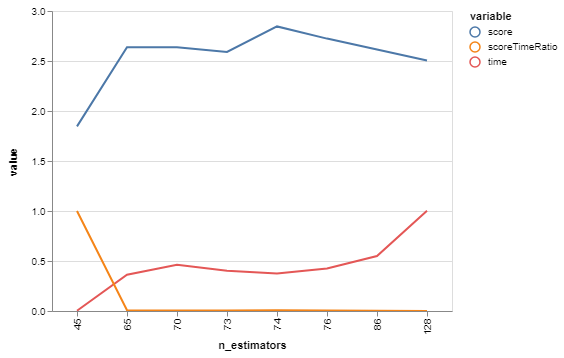

In [11]:
n_estimators = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "n_estimators", 
                    0, 
                    45, 
                    128)

bgs.showTimeScoreChartAndGraph(n_estimators)

,n_estimators,score,time,scoreTimeRatio
0,65,5.702345,0.410516,0.062885
1,80,6.219586,1.044962,0.000000
2,72,5.529931,0.319221,0.090075
3,69,5.943724,0.044962,1.000000
4,67,5.219586,0.360534,0.067533


,n_estimators,score,time
0,65,0.989476,0.344010
1,80,0.989575,0.358120
2,72,0.989443,0.341979
3,69,0.989522,0.335879
4,67,0.989383,0.342898


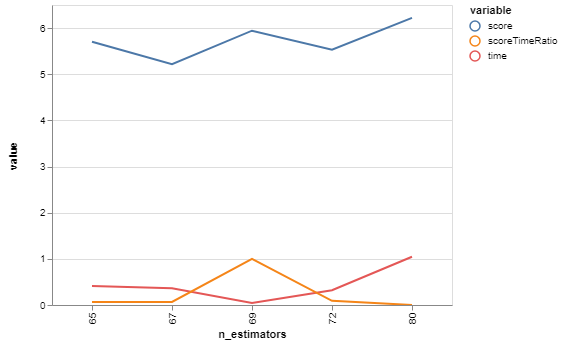

In [12]:
n_estimators = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "n_estimators", 
                    0, 
                    65, 
                    80)

bgs.showTimeScoreChartAndGraph(n_estimators)

,n_estimators,score,time,scoreTimeRatio
0,65,7.398476,0.447761,0.050028
1,86,7.303238,1.037626,0.000000
2,76,7.731810,0.313612,0.092913
3,70,7.398476,0.037626,1.000000
4,73,7.208000,0.166424,0.191318
5,74,8.208000,0.184974,0.196924


,n_estimators,score,time
0,65,0.989476,0.353464
1,86,0.989463,0.369141
2,76,0.989522,0.349898
3,70,0.989476,0.342563
4,73,0.989450,0.345986
5,74,0.989588,0.346479


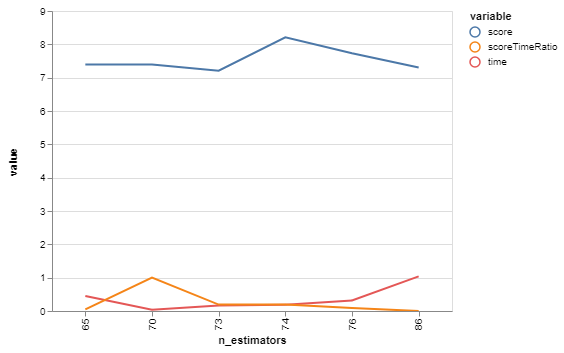

In [13]:
n_estimators = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "n_estimators", 
                    0, 
                    65, 
                    86)

bgs.showTimeScoreChartAndGraph(n_estimators)